In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [18]:
import os
os.getcwd()

'c:\\Users\\sarah\\Downloads'

In [2]:
# question 1
# Does the amount of bound SO2 affct the quality of wine? 

#pseudocode 
#1. Select columns free SO2, total SO2, and quality 
#2. Calculate bound SO2 (total - free) and assign as new column
#3. Calculate mean of bound SO2 at quality
#4. Sort by bound SO2 values 

In [3]:
#read in data 
wineData = pd.read_csv("c:\\Users\\sarah\\OneDrive\\Documents\\DS3001_ML\winequality-red.csv", delimiter=";")
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wineData2 = wineData.loc[:, ['free sulfur dioxide', 'total sulfur dioxide', 'quality']]
wineData2.head()

,free sulfur dioxide,total sulfur dioxide,quality
0,11.0,34.0,5
1,25.0,67.0,5
2,15.0,54.0,5
3,17.0,60.0,6
4,11.0,34.0,5


In [5]:
wineData3 = wineData2.assign(boundSO2 = wineData2['total sulfur dioxide'] - wineData2['free sulfur dioxide'])
wineData3.head()

,free sulfur dioxide,total sulfur dioxide,quality,boundSO2
0,11.0,34.0,5,23.0
1,25.0,67.0,5,42.0
2,15.0,54.0,5,39.0
3,17.0,60.0,6,43.0
4,11.0,34.0,5,23.0


In [6]:
wineData4 = wineData3.loc[:, ['quality', 'boundSO2']]
wineData4.head()


,quality,boundSO2
0,5,23.0
1,5,42.0
2,5,39.0
3,6,43.0
4,5,23.0


In [7]:
wineData5 = wineData4.groupby(['quality']).mean()
wineData5.sort_values(by=['boundSO2'])

,boundSO2
quality,
3,13.900000
8,20.166667
7,20.974874
4,23.981132
6,25.158307
5,39.530103


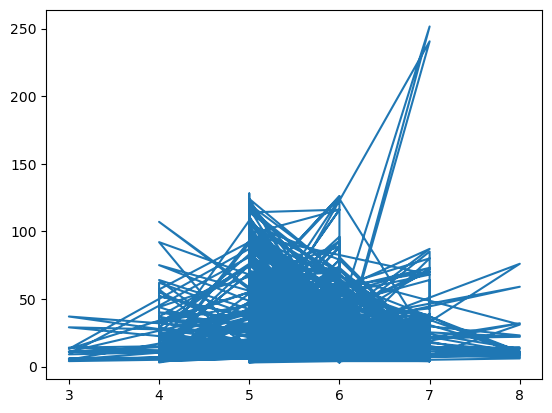

In [9]:
#plotting data 
x = np.asarray(wineData4['quality'])
y = np.asarray(wineData4['boundSO2'])
plt.plot(x, y)
plt.show()

In [10]:
#question 1 function 
def boundSO2_quality(x):
    x1 = x.loc[:, ['free sulfur dioxide', 'total sulfur dioxide', 'quality']]
    create_boundSO2 = x1.assign(boundSO2 = wineData2['total sulfur dioxide'] - wineData2['free sulfur dioxide'])
    quality_and_boundSO2 = create_boundSO2.loc[:, ['quality', 'boundSO2']]
    find_means = quality_and_boundSO2.groupby(['quality']).mean()
    sorted_boundSO2 = find_means.sort_values(by=['boundSO2'])
    return sorted_boundSO2
    
    

In [11]:
#question 2 
# What is the oldest Mean Age Childbearing (years) in Northern Africa and Western Asia? 

#pseudocode 
#1. Select columns (Region, subregion, country or area *, Mean Age Childbearing (years))
#2. Select rows Northern Africa and Western Asia from Region, subregion, country or area column 
#3. Group by Mean Age Childbering (years) by mean 
#4. Sort means in descending order 

In [41]:
#read in data 
DemoIndicators = pd.read_csv("c:\\Users\\sarah\\OneDrive\\Documents\\DS3001_ML\DEMOGRAPHIC_INDICATORS_COMPACT_REV1.csv",  encoding='unicode_escape', delimiter=",")
DemoIndicators

C:\Users\sarah\AppData\Local\Temp\ipykernel_72264\3730607941.py:2: DtypeWarning: Columns (0,3,4,7,9,10,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  DemoIndicators = pd.read_csv("c:\\Users\\sarah\\OneDrive\\Documents\\DS3001_ML\DEMOGRAPHIC_INDICATORS_COMPACT_REV1.csv",  encoding='unicode_escape', delimiter=",")


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20607,20592,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876,Country/Area,957,...,92,103,31,27,34,83,82,83,- 0,-16.7
20608,20593,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876,Country/Area,957,...,99,89,29,29,29,80,89,72,- 0,-14.4
20609,20594,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876,Country/Area,957,...,78,80,24,22,26,67,69,64,- 0,-14.5
20610,20595,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876,Country/Area,957,...,86,86,27,25,28,73,76,70,- 0,-7.1


In [54]:
#data cleaning 
DemoIndicators.columns = DemoIndicators.loc[15]
DemoIndicators.head()

15,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
15,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,Male Mortality before Age 60 (deaths under age...,Female Mortality before Age 60 (deaths under a...,"Mortality between Age 15 and 50, both sexes (d...",Male Mortality between Age 15 and 50 (deaths u...,Female Mortality between Age 15 and 50 (deaths...,"Mortality between Age 15 and 60, both sexes (d...",Male Mortality between Age 15 and 60 (deaths u...,Female Mortality between Age 15 and 60 (deaths...,Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
16,1,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,581,498,240,272,208,379,430,325,0,0
17,2,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,567,490,231,258,204,368,416,319,0,0
18,3,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,546,477,219,240,197,353,396,310,0,0
19,4,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,536,470,213,233,193,345,386,304,0,0


In [56]:
#data cleaning
DemoIndicators = DemoIndicators.loc[16:, :]
DemoIndicators.head()

15,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
16,1,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,581,498,240,272,208,379,430,325,0,0
17,2,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,567,490,231,258,204,368,416,319,0,0
18,3,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,546,477,219,240,197,353,396,310,0,0
19,4,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,536,470,213,233,193,345,386,304,0,0
20,5,Estimates,WORLD,NaN,900,NaN,NaN,1,World,0,...,523,458,206,224,187,335,375,296,0,0


In [57]:
DemoIndicators2 = DemoIndicators.loc[:, ['Region, subregion, country or area *', 'Mean Age Childbearing (years)']]
DemoIndicators2.head()

15,"Region, subregion, country or area *",Mean Age Childbearing (years)
16,WORLD,28.9
17,WORLD,28.9
18,WORLD,29.0
19,WORLD,28.9
20,WORLD,28.9


In [58]:
DemoIndicators3 = DemoIndicators2.loc[DemoIndicators2['Region, subregion, country or area *'] == 'Northern Africa and Western Asia']
DemoIndicators3.head()

15,"Region, subregion, country or area *",Mean Age Childbearing (years)
161,Northern Africa and Western Asia,29.1
162,Northern Africa and Western Asia,29.1
163,Northern Africa and Western Asia,29.1
164,Northern Africa and Western Asia,29.1
165,Northern Africa and Western Asia,29.1


In [59]:
DemoIndicators4 = DemoIndicators3.loc[:, ['Mean Age Childbearing (years)']]
DemoIndicators4.head()

15,Mean Age Childbearing (years)
161,29.1
162,29.1
163,29.1
164,29.1
165,29.1


In [60]:
DemoIndicators5 = DemoIndicators4.groupby(['Mean Age Childbearing (years)']).mean()
DemoIndicators5.sort_values(by=['Mean Age Childbearing (years)'], ascending=False)

15
Mean Age Childbearing (years)
29.6
29.5
29.4
29.3
29.2
29.1
29.0


In [61]:
#function 
#question 2 function 

def NAandWA_childbearing(y):
    y1 = y.loc[:, ['Region, subregion, country or area *', 'Mean Age Childbearing (years)']]
    NAandWA_rows = y1.loc[y1['Region, subregion, country or area *'] == 'Northern Africa and Western Asia']
    childbearing_years = NAandWA_rows.loc[:, ['Mean Age Childbearing (years)']]
    mean_childbearing_years = childbearing_years.groupby(['Mean Age Childbearing (years)']).mean()
    sorted_childbearing_years = mean_childbearing_years.sort_values(by=['Mean Age Childbearing (years)'], ascending=False)
    return sorted_childbearing_years